## GFL Environmental
GFL Environmental Inc. is a leading North American provider of diversified environmental solutions.GFL is the only major diversified environmental services company in North America offering services in solid waste management, liquid waste management and infrastructure development.

In [2]:
#Importing Libraries
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [2]:
#GFL
#Getting stock price data
start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()
df = pdr.DataReader("GFL.TO", 'yahoo', start, end)  # Collects data
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-03,24.010000,22.400000,23.370001,22.400000,403100.0,22.373423
2020-03-04,23.950001,23.010000,23.250000,23.290001,175400.0,23.262369
2020-03-05,23.820000,23.049999,23.820000,23.490000,164300.0,23.462130
2020-03-06,23.100000,21.830000,23.030001,22.980000,194000.0,22.952734
2020-03-09,22.219999,20.400000,21.740000,22.040001,64000.0,22.013853


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-31,29.400000,28.670000,29.370001,28.879999,48000.0,28.879999
2020-08-04,30.020000,29.100000,29.200001,29.850000,64200.0,29.850000
2020-08-05,30.480000,29.480000,30.000000,30.480000,80500.0,30.480000
2020-08-06,30.780001,27.040001,30.170000,29.250000,278900.0,29.250000
2020-08-07,29.900000,28.650000,29.670000,29.150000,65501.0,29.150000


In [5]:
#Making the data as csv
df.to_csv("GFLdata.csv")

In [6]:
##Reading the same data from local csv file
data=pd.read_csv("GFLdata.csv" ,parse_dates=True, index_col=0)

Text(0, 0.5, 'Stock Value')

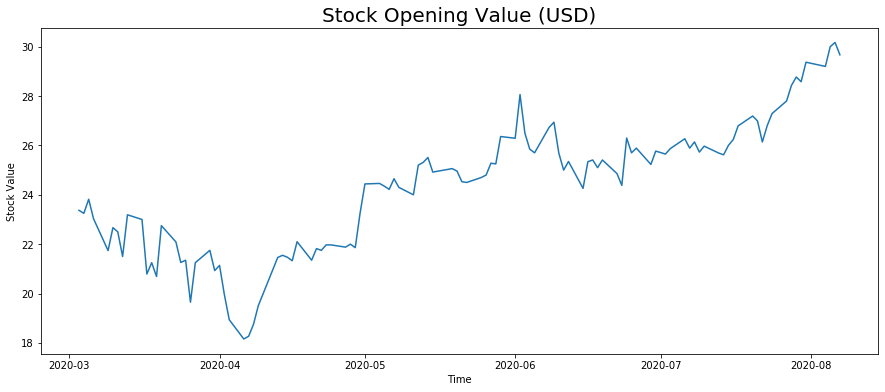

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(data["Open"])
plt.title('Stock Opening Value (USD)', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')

Text(0, 0.5, 'Stock Value')

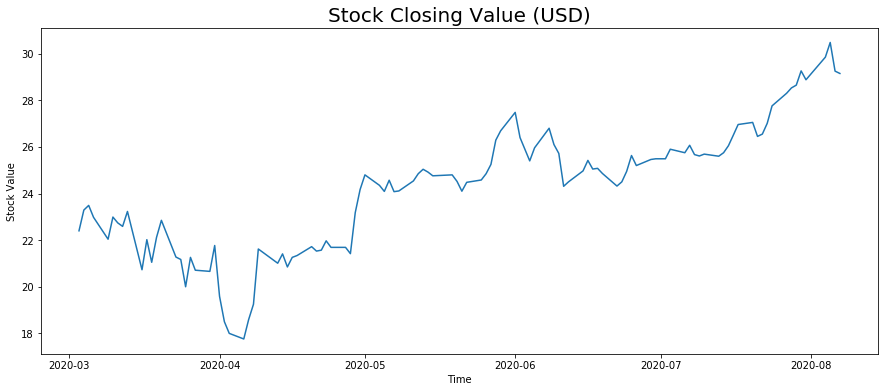

In [8]:
plt.figure(figsize=(15,6))
plt.plot(data["Close"])
plt.title('Stock Closing Value (USD)', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')

## Stock Data Manipulation
A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. 

In [9]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-03,24.010000,22.400000,23.370001,22.400000,403100.0,22.373423
2020-03-04,23.950001,23.010000,23.250000,23.290001,175400.0,23.262369
2020-03-05,23.820000,23.049999,23.820000,23.490000,164300.0,23.462130
2020-03-06,23.100000,21.830000,23.030001,22.980000,194000.0,22.952734
2020-03-09,22.219999,20.400000,21.740000,22.040001,64000.0,22.013853
...,...,...,...,...,...,...
2020-07-31,29.400000,28.670000,29.370001,28.879999,48000.0,28.879999
2020-08-04,30.020000,29.100000,29.200001,29.850000,64200.0,29.850000
2020-08-05,30.480000,29.480000,30.000000,30.480000,80500.0,30.480000


In [10]:
gfl_close=pd.DataFrame(df.Close)

In [11]:
gfl_close

,Close
Date,
2020-03-03,22.400000
2020-03-04,23.290001
2020-03-05,23.490000
2020-03-06,22.980000
2020-03-09,22.040001
...,...
2020-07-31,28.879999
2020-08-04,29.850000
2020-08-05,30.480000


In [12]:
# Create, and add 5 days moving average to dataframe
data['5ma'] = data['Close'].rolling(window=5,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,5ma
Date,,,,,,,
2020-03-03,24.010000,22.400000,23.370001,22.400000,403100.0,22.373423,22.400
2020-03-04,23.950001,23.010000,23.250000,23.290001,175400.0,23.262369,22.845
2020-03-05,23.820000,23.049999,23.820000,23.490000,164300.0,23.462130,23.060
2020-03-06,23.100000,21.830000,23.030001,22.980000,194000.0,22.952734,23.040
2020-03-09,22.219999,20.400000,21.740000,22.040001,64000.0,22.013853,22.840


Text(0, 0.5, 'Stock Value')

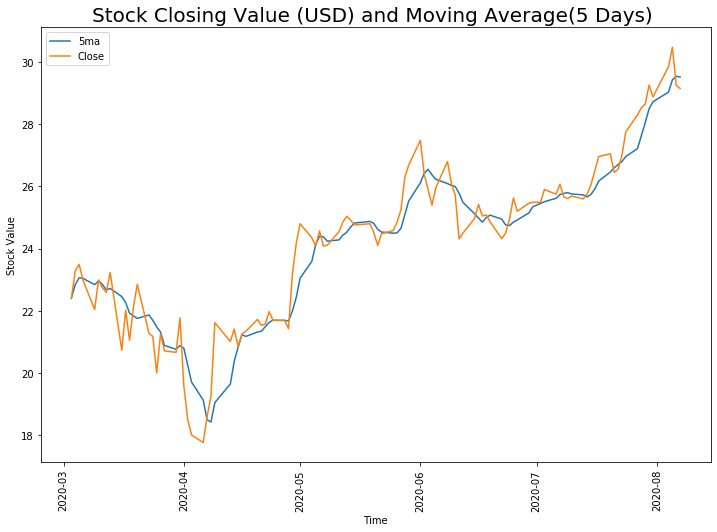

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(data[["5ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(5 Days) ', fontsize = 20)
plt.legend(labels=data[["5ma","Close"]])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Stock Value')

In [14]:
# Create, and add 10days moving average to dataframe
data['10ma'] = data['Close'].rolling(window=10,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,5ma,10ma
Date,,,,,,,,
2020-03-03,24.010000,22.400000,23.370001,22.400000,403100.0,22.373423,22.400,22.400
2020-03-04,23.950001,23.010000,23.250000,23.290001,175400.0,23.262369,22.845,22.845
2020-03-05,23.820000,23.049999,23.820000,23.490000,164300.0,23.462130,23.060,23.060
2020-03-06,23.100000,21.830000,23.030001,22.980000,194000.0,22.952734,23.040,23.040
2020-03-09,22.219999,20.400000,21.740000,22.040001,64000.0,22.013853,22.840,22.840


Text(0, 0.5, 'Stock Value')

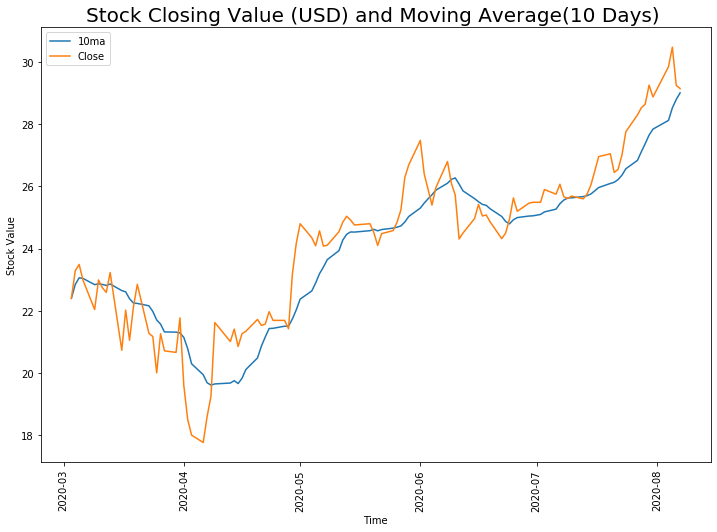

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(data[["10ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(10 Days) ', fontsize = 20)
plt.legend(labels=data[["10ma","Close"]])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Stock Value')

In [16]:
# Create, and add 20days moving average to dataframe
data['20ma'] = data['Close'].rolling(window=20,min_periods=0).mean()
data.head()

,High,Low,Open,Close,Volume,Adj Close,5ma,10ma,20ma
Date,,,,,,,,,
2020-03-03,24.010000,22.400000,23.370001,22.400000,403100.0,22.373423,22.400,22.400,22.400
2020-03-04,23.950001,23.010000,23.250000,23.290001,175400.0,23.262369,22.845,22.845,22.845
2020-03-05,23.820000,23.049999,23.820000,23.490000,164300.0,23.462130,23.060,23.060,23.060
2020-03-06,23.100000,21.830000,23.030001,22.980000,194000.0,22.952734,23.040,23.040,23.040
2020-03-09,22.219999,20.400000,21.740000,22.040001,64000.0,22.013853,22.840,22.840,22.840


Text(0, 0.5, 'Stock Value')

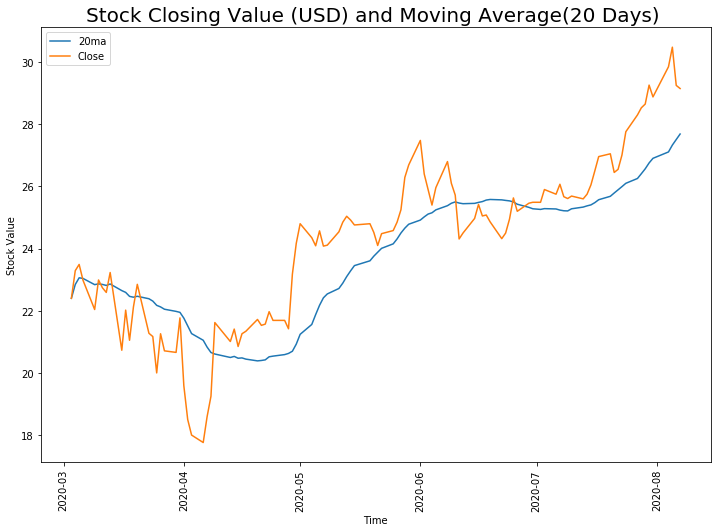

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(data[["20ma","Close"]])
plt.title('Stock Closing Value (USD) and Moving Average(20 Days) ', fontsize = 20)
plt.legend(labels=data[["20ma","Close"]])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Stock Value')

## Resampling:-
Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.

In [18]:
# Resample to get open-high-low-close (OHLC) on every 7 days of data(weekly basis).
weekly_ohlc = data.Close.resample('W').ohlc() 
weekly_volume = data.Volume.resample('W').sum()

In [19]:
weekly_ohlc.head()

,open,high,low,close
Date,,,,
2020-03-08,22.400000,23.490,22.400000,22.980000
2020-03-15,22.040001,23.230,22.040001,23.230000
2020-03-22,20.730000,22.850,20.730000,22.850000
2020-03-29,21.275000,21.275,20.000000,20.709999
2020-04-05,20.660000,21.770,18.000000,18.000000


In [20]:
weekly_volume.head()

Date
2020-03-08    936800.0
2020-03-15    380800.0
2020-03-22    249700.0
2020-03-29    313300.0
2020-04-05    235900.0
Freq: W-SUN, Name: Volume, dtype: float64

In [21]:
weekly_ohlc.reset_index(inplace=True)
weekly_ohlc.Date = weekly_ohlc.Date.map(mdates.date2num)
weekly_ohlc.head()

,Date,open,high,low,close
0,737492.0,22.400000,23.490,22.400000,22.980000
1,737499.0,22.040001,23.230,22.040001,23.230000
2,737506.0,20.730000,22.850,20.730000,22.850000
3,737513.0,21.275000,21.275,20.000000,20.709999
4,737520.0,20.660000,21.770,18.000000,18.000000


## CandleStick Charts:-
 1. Candlesticks have become a staple of every trading platform and charting program for literally every financial trading vehicle.
 2. A candlestick is composed of three parts; the upper shadow, lower shadow and body. The body is colored green or red. Each candlestick represents a segmented period of time. 
 3. The high is represents by a vertical line extending from the top of the body to the highest price called a shadow, tail or wick. 
 4. The low of the candle is the lower shadow or tail, represented by a vertical line extending down from the body. 
 5. If the close is higher than the open, then the body is colored green representing a net price gain. If the open is higher than the close, then the body is colored red as it represents a net price decline.

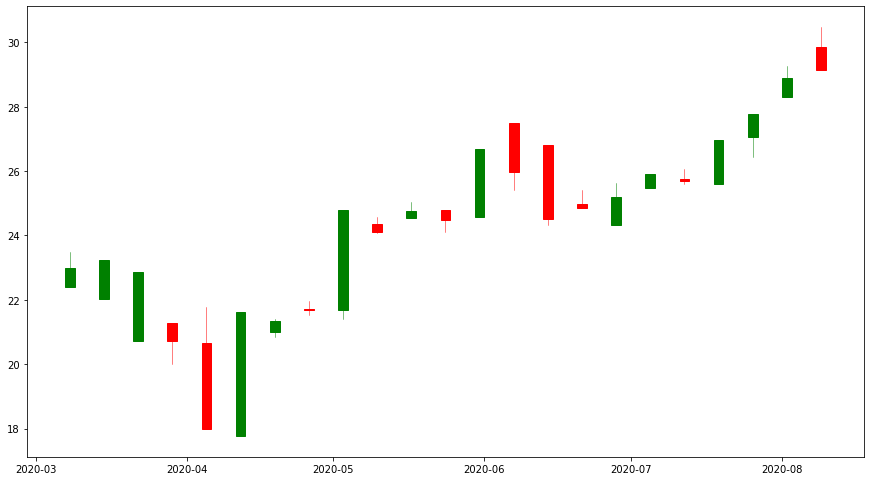

In [22]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, weekly_ohlc.values, width=2, colorup='g')
plt.show()

## 5 days candlestick

In [23]:
# Resample to get open-high-low-close (OHLC) on every 5 days of data.
df_ohlc_5 = data.Close.resample('5D').ohlc() 
df_volume_5 = data.Volume.resample('5D').sum()

In [24]:
df_ohlc_5.reset_index(inplace=True)
df_ohlc_5.Date = df_ohlc_5.Date.map(mdates.date2num)
df_ohlc_5.head()

,Date,open,high,low,close
0,737487.0,22.400000,23.490,22.400000,22.980000
1,737492.0,22.040001,22.990,22.040001,22.590000
2,737497.0,23.230000,23.230,20.730000,22.020000
3,737502.0,21.049999,22.850,21.049999,22.850000
4,737507.0,21.275000,21.275,20.000000,20.709999


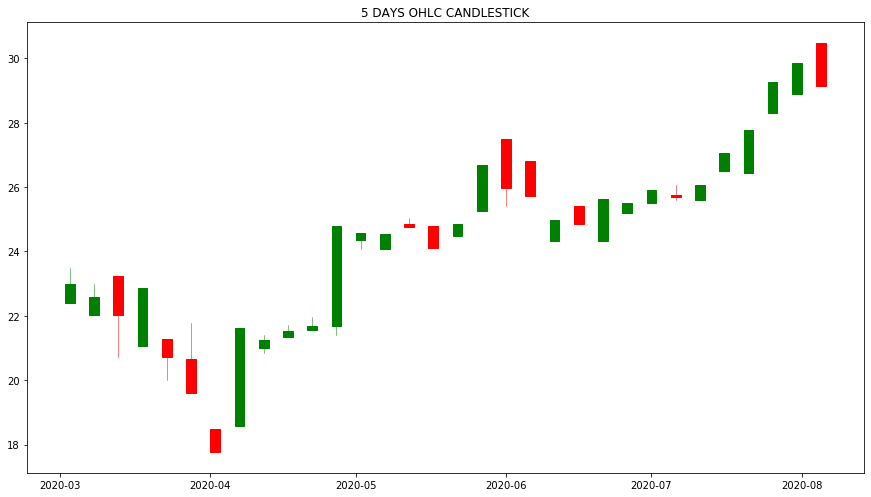

In [25]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc_5.values, width=2, colorup='g')
plt.title("5 DAYS OHLC CANDLESTICK")
plt.show()

## 10 days candlestick

In [26]:
# Resample to get open-high-low-close (OHLC) on every 10 days of data
df_ohlc_10 = data.Close.resample('10D').ohlc() 
df_volume_10 = data.Volume.resample('10D').sum()

In [27]:
df_ohlc_10.reset_index(inplace=True)
df_ohlc_10.Date = df_ohlc_10.Date.map(mdates.date2num)
df_ohlc_10.head()

,Date,open,high,low,close
0,737487.0,22.400,23.490000,22.040001,22.590000
1,737497.0,23.230,23.230000,20.730000,22.850000
2,737507.0,21.275,21.770000,19.590000,19.590000
3,737517.0,18.500,21.620001,17.760000,21.620001
4,737527.0,21.010,21.719999,20.850000,21.530001


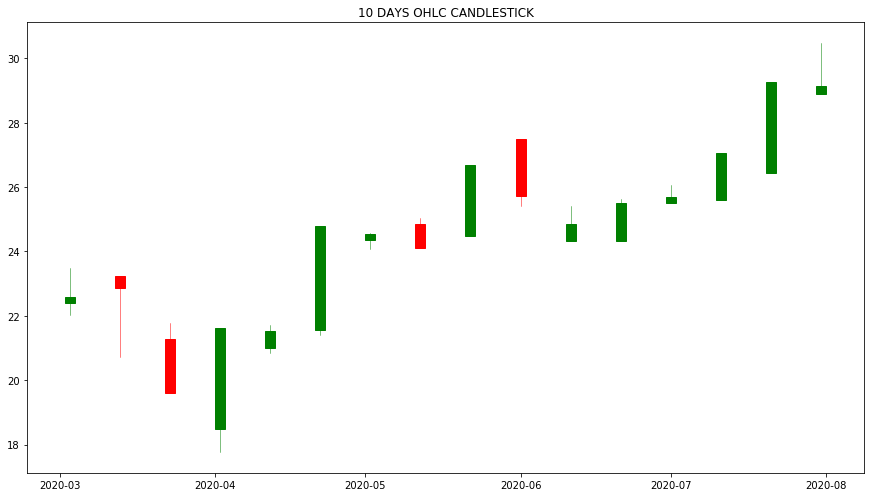

In [28]:
# Create and visualize candlestick charts
plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc_10.values, width=2, colorup='g')
plt.title("10 DAYS OHLC CANDLESTICK")
plt.show()

## Key Takeaways:-
1. Every candlestick tells a story of the showdown between the bulls and the bears,buyers and sellers, supply and demand, fear and greed.
2. The candlesticks indicates a bullish pattern. This means that overally, the stocks are likely to increase.There are more greens than reds.